In [2]:
import requests
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
from google.colab import drive

# Подключение Google Диска
drive.mount('/content/drive')
#df = pd.read_excel("/Users/terrylimax/Desktop/tab3_zpl_2023.xlsx")

Mounted at /content/drive


In [3]:
import os
print(os.getcwd())
print(os.listdir())

/content
['.config', 'drive', 'sample_data']


In [4]:
os.chdir('/content/drive/MyDrive/Project Stepik Start Data Science')

In [52]:
#путь к файлу
file_path = '/content/drive/MyDrive/Project Stepik Start Data Science/Salaries.xlsx'
#считываем файл
df = pd.read_excel(file_path)

In [41]:
df.head()

,Экономическая деятельность,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,...,37062,46676,54927,68032.0,75766,88603.8,94983,101547.4,121726.2,143135.1
1,Добыча топливно-энергетических полезных ископ...,6985.1,10905.4,13080.3,16135.5,19903.3,23455.9,27614.5,33275.5,39051.3,...,66780,71418,77586,104078.3,127771,135363.7,142175,149585.1,165623.8,180947.0
2,Финансовая деятельность,5232.2,8885.2,13245.9,15561.2,17383.8,22463.5,27885.5,34879.8,41871.8,...,68565,70088,80289,84904.0,91070,103667.8,112680,130223.3,146637.1,170600.2
3,Образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,...,25862,26928,28088,30257.6,34361,37071.9,39563,43390.5,48400.2,54314.8


**`years`** - список годов в данных

In [67]:
#years - список годов в данных
years = df.columns[1:].astype(int)
years[-5:]

Index([2019, 2020, 2021, 2022, 2023], dtype='int64')

# Обработка файла с инфляцией

In [43]:
#путь к файлу
file_path = '/content/drive/MyDrive/Project Stepik Start Data Science/inflation_data.csv'
#считываем файл
inflation_df = pd.read_csv(file_path)

In [11]:
inflation_df.head()

,Год,Янв,Фев,Мар,Апр,Май,Июн,Июл,Авг,Сен,Окт,Ноя,Дек,Всего
0,2024,7.44,7.67,7.69,7.82,8.29,8.58,9.13,NaN,NaN,NaN,NaN,NaN,5.05
1,2023,11.76,10.97,3.51,2.30,2.50,3.24,4.30,5.13,6.00,6.68,7.47,7.42,7.42
2,2022,8.74,9.16,16.70,17.83,17.11,15.90,15.09,14.30,13.67,12.63,11.97,11.92,11.92
3,2021,5.19,5.67,5.78,5.52,6.01,6.51,6.47,6.69,7.41,8.14,8.40,8.39,8.39
4,2020,2.42,2.31,2.55,3.10,3.03,3.21,3.37,3.57,3.67,3.98,4.42,4.91,4.91


Нам нужна только инлфция по годам

In [44]:
# Извлечение первого и последнего столбца
first_column = inflation_df.iloc[:, 0]  # Первый столбец
last_column = inflation_df.iloc[:, -1]  # Последний столбец

# Создание нового DataFrame с первым и последним столбцом
filtered_result = pd.concat([first_column, last_column], axis=1)
filtered_result = filtered_result[(filtered_result['Год'] >= 2000) & (filtered_result['Год'] <= 2023)]

# Отображение результата
filtered_result

,Год,Всего
1,2023,7.42
2,2022,11.92
3,2021,8.39
4,2020,4.91
5,2019,3.05
6,2018,4.27
7,2017,2.52
8,2016,5.38
9,2015,12.91
10,2014,11.36


In [45]:
#Создание сводной таблицы для переменной inflation_rate, в которой значения сгруппированы по столбцам “Год” и значениям в столбце “Всего”.
inflation_rate = filtered_result.pivot_table(columns="Год", values="Всего")
inflation_rate

Год,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Всего,20.2,18.58,15.06,11.99,11.74,10.91,9.0,11.87,13.28,8.8,...,11.36,12.91,5.38,2.52,4.27,3.05,4.91,8.39,11.92,7.42


In [46]:
inflation_rate = inflation_rate.values[0][0:]
#print(inflation_rate)
#print(len(inflation_rate))

#Вычисление накопленной инфляции по годам с округлением значений и сохранением в new_inflation.
inflation=0
new_inflation=[]
for i in inflation_rate:
  inflation+=i
  new_inflation.append(inflation.round())

#print(new_inflation)

# Визуализация Зарплат и влияния инфляции

Построим линейные графики изменения номинальной и реальной зарплат

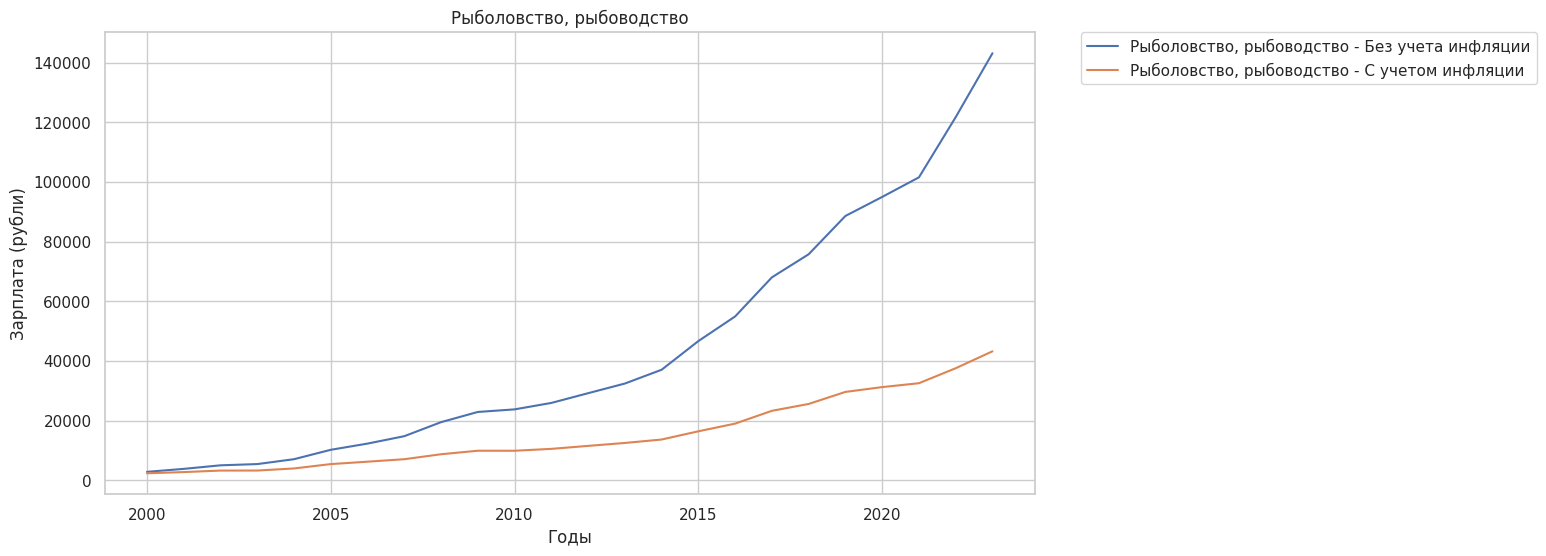

Абсолютное значение повышения зарплаты БЕЗ учета инфляции для направления Рыболовство, рыбоводство : 140290
Абсолютное значение повышения зарплаты с учетом инфляции для направления Рыболовство, рыбоводство : 40872


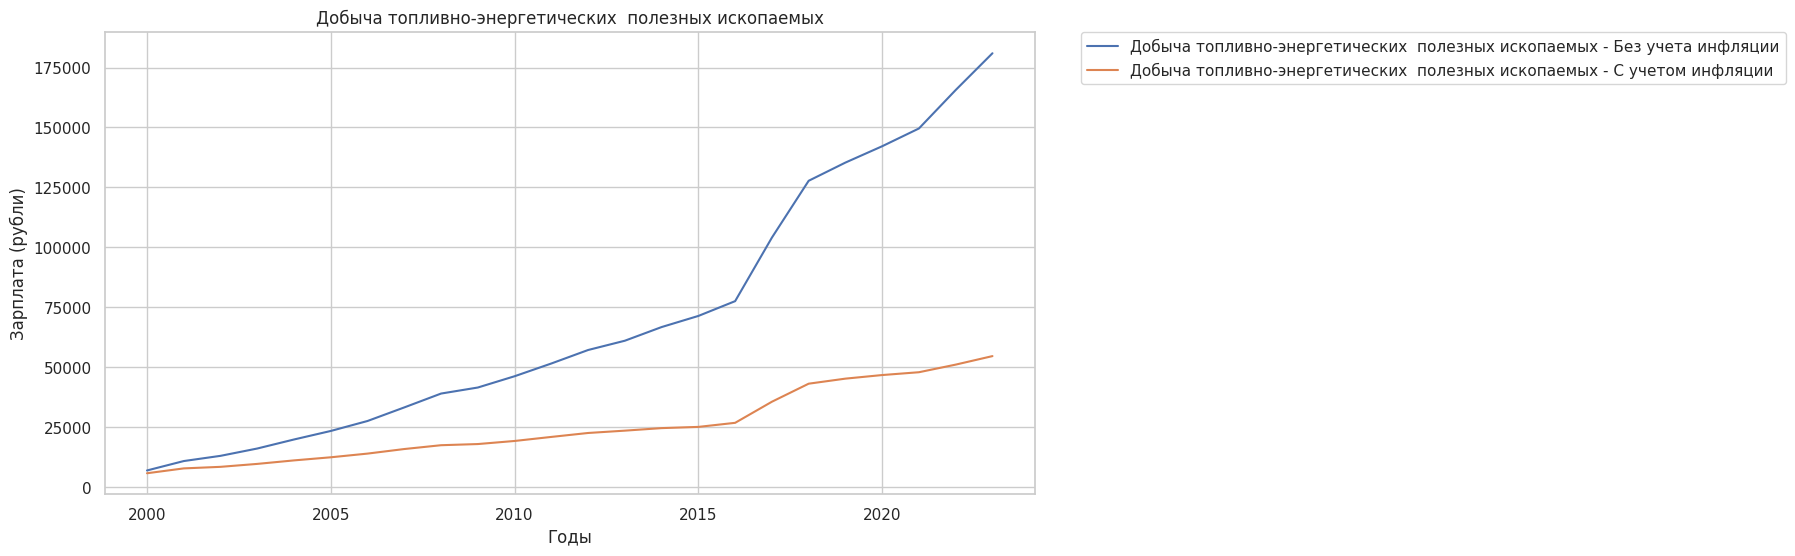

Абсолютное значение повышения зарплаты БЕЗ учета инфляции для направления Добыча топливно-энергетических  полезных ископаемых : 173962
Абсолютное значение повышения зарплаты с учетом инфляции для направления Добыча топливно-энергетических  полезных ископаемых : 48846


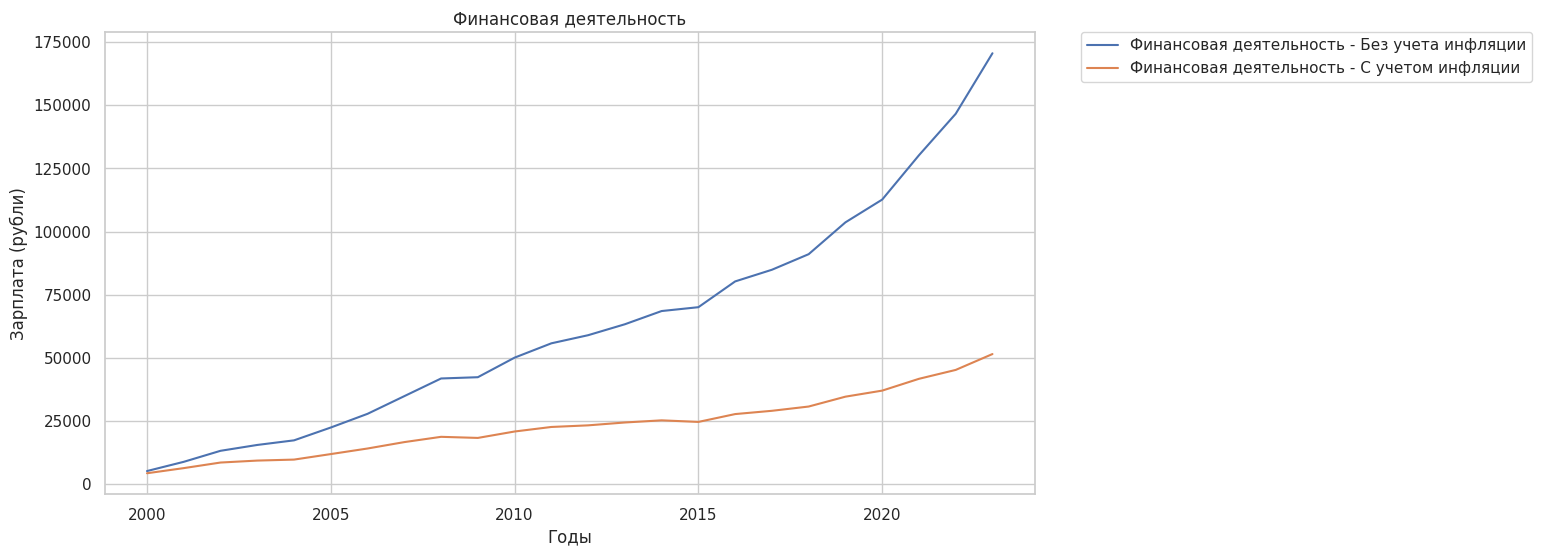

Абсолютное значение повышения зарплаты БЕЗ учета инфляции для направления Финансовая деятельность : 165368
Абсолютное значение повышения зарплаты с учетом инфляции для направления Финансовая деятельность : 47181


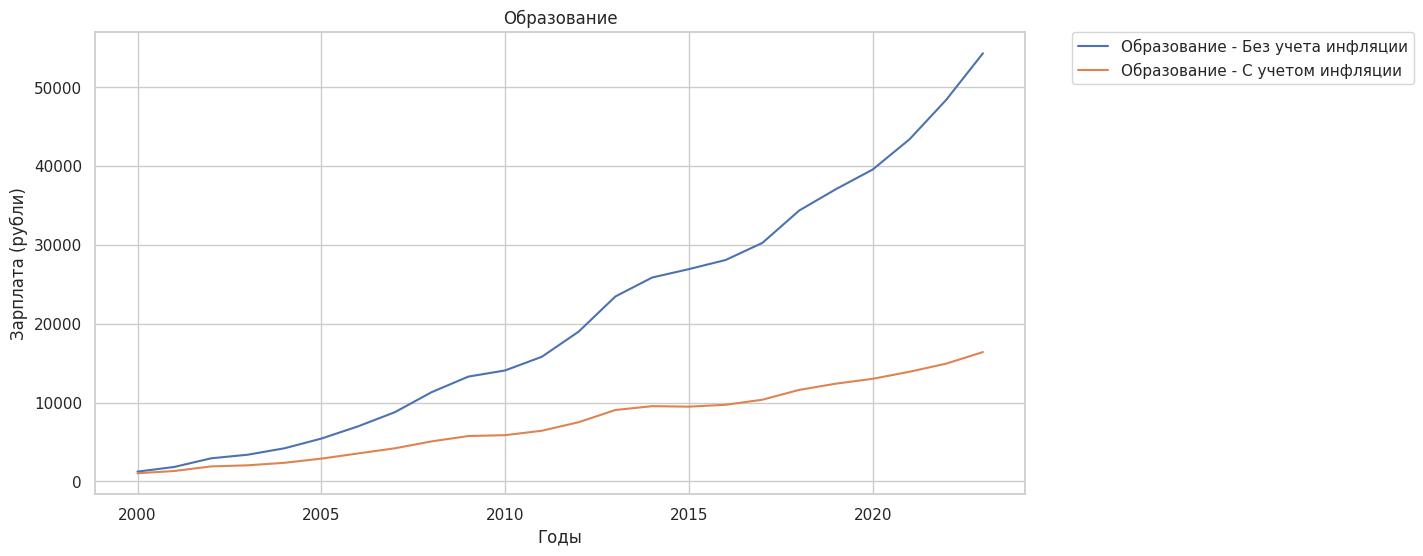

Абсолютное значение повышения зарплаты БЕЗ учета инфляции для направления Образование : 53075
Абсолютное значение повышения зарплаты с учетом инфляции для направления Образование : 15376


In [71]:
import seaborn as sns
activities = df['Экономическая деятельность'].values

for i in activities:
  economic_activity = df[df['Экономическая деятельность'] == i].values[0][1:]
  # Инициализируем переменную для совокупного коэффициента инфляции
  cumulative_inflation = 0

  # Рассчитываем реальную зарплату с учетом совокупной инфляции
  real_salary = []
  for nominal, cumulative_inflation in zip(economic_activity, new_inflation):
    #print(cumulative_inflation)
    real_salary.append(nominal/(1+cumulative_inflation/100))
  #print(real_salary)

  # Построение графика
  sns.set(style="whitegrid")  # Выбор стиля
  plt.figure(figsize=(12, 6))  # Установка размера фигуры

  #строим линейные графики
  sns.lineplot(x=years, y=economic_activity, label=f"{i} - Без учета инфляции") # строим график зп без учета инфляции
  sns.lineplot(x=years, y=real_salary, label=f"{i} - С учетом инфляции") # строим график зп с учетом инфляции

  # Добавление подписей
  plt.title(i)
  plt.xlabel("Годы")
  plt.ylabel("Зарплата (рубли)")

  # Перемещаем легенду за пределы графика
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

  # Отображение сетки
  plt.grid(True)
  # Отображение графика
  plt.show()
  print('Абсолютное значение повышения зарплаты БЕЗ учета инфляции для направления',i,':', round((economic_activity[-1]-economic_activity[0])))
  print('Абсолютное значение повышения зарплаты с учетом инфляции для направления',i,':', round((real_salary[-1]-real_salary[0])))

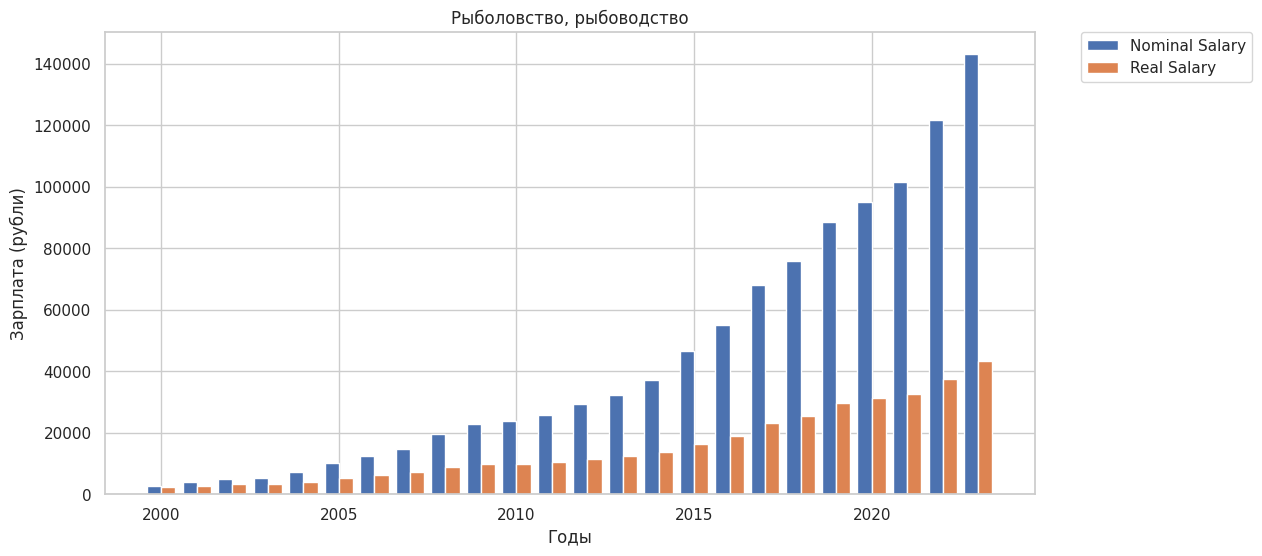

Абсолютное значение повышения зарплаты БЕЗ учета инфляции для направления Рыболовство, рыбоводство : 140290
Абсолютное значение повышения зарплаты с учетом инфляции для направления Рыболовство, рыбоводство : 40872


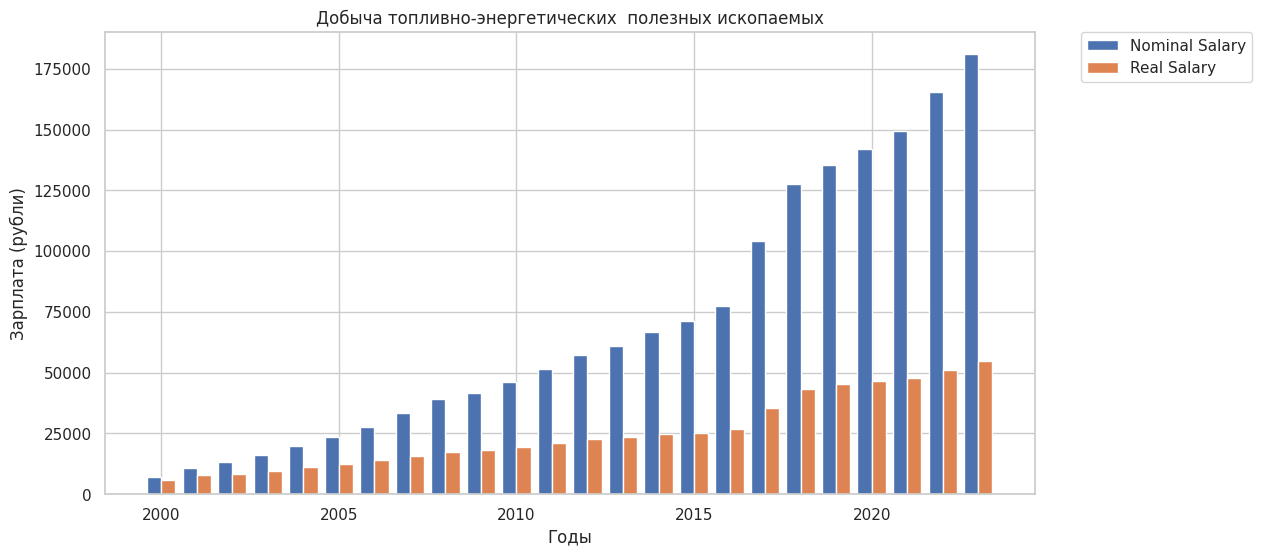

Абсолютное значение повышения зарплаты БЕЗ учета инфляции для направления Добыча топливно-энергетических  полезных ископаемых : 173962
Абсолютное значение повышения зарплаты с учетом инфляции для направления Добыча топливно-энергетических  полезных ископаемых : 48846


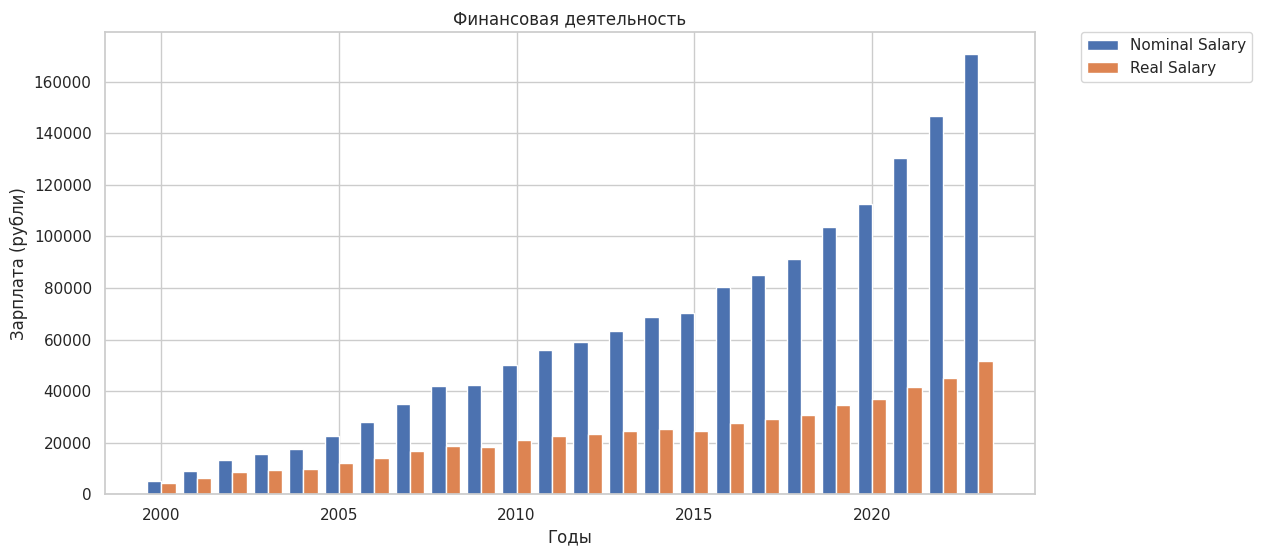

Абсолютное значение повышения зарплаты БЕЗ учета инфляции для направления Финансовая деятельность : 165368
Абсолютное значение повышения зарплаты с учетом инфляции для направления Финансовая деятельность : 47181


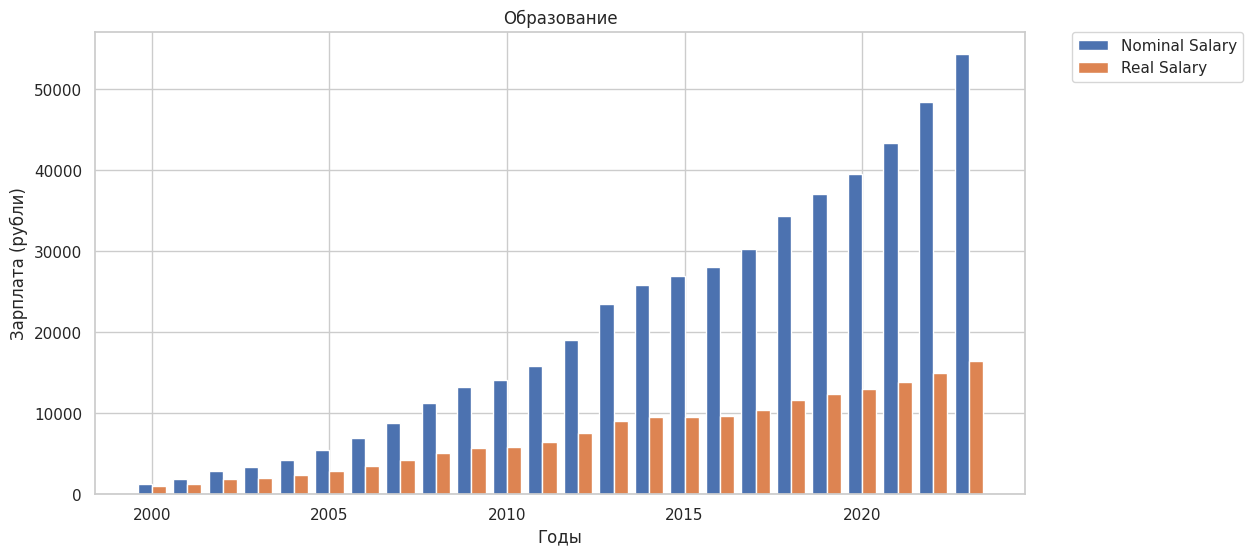

Абсолютное значение повышения зарплаты БЕЗ учета инфляции для направления Образование : 53075
Абсолютное значение повышения зарплаты с учетом инфляции для направления Образование : 15376


In [72]:
import seaborn as sns
activities = df['Экономическая деятельность'].values

for i in activities:
  economic_activity = df[df['Экономическая деятельность'] == i].values[0][1:]
  # Инициализируем переменную для совокупного коэффициента инфляции
  cumulative_inflation = 0

  # Рассчитываем реальную зарплату с учетом совокупной инфляции
  real_salary = []
  for nominal, cumulative_inflation in zip(economic_activity, new_inflation):
    #print(cumulative_inflation)
    real_salary.append(nominal/(1+cumulative_inflation/100))
  #print(real_salary)

  # Построение графика
  sns.set(style="whitegrid")  # Выбор стиля
  plt.figure(figsize=(12, 6))  # Установка размера фигуры

  # Создание сгруппированной столбчатой диаграммы
  bar_width = 0.4
  # Создание столбцов
  plt.bar(years - bar_width/2, economic_activity, width=bar_width, label='Nominal Salary')
  plt.bar(years + bar_width/2, real_salary, width=bar_width, label='Real Salary')


  # Добавление подписей
  plt.title(i)
  plt.xlabel("Годы")
  plt.ylabel("Зарплата (рубли)")

  # Перемещаем легенду за пределы графика
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

  # Отображение сетки
  plt.grid(True)
  # Отображение графика
  plt.show()
  print('Абсолютное значение повышения зарплаты БЕЗ учета инфляции для направления',i,':', round((economic_activity[-1]-economic_activity[0])))
  print('Абсолютное значение повышения зарплаты с учетом инфляции для направления',i,':', round((real_salary[-1]-real_salary[0])))

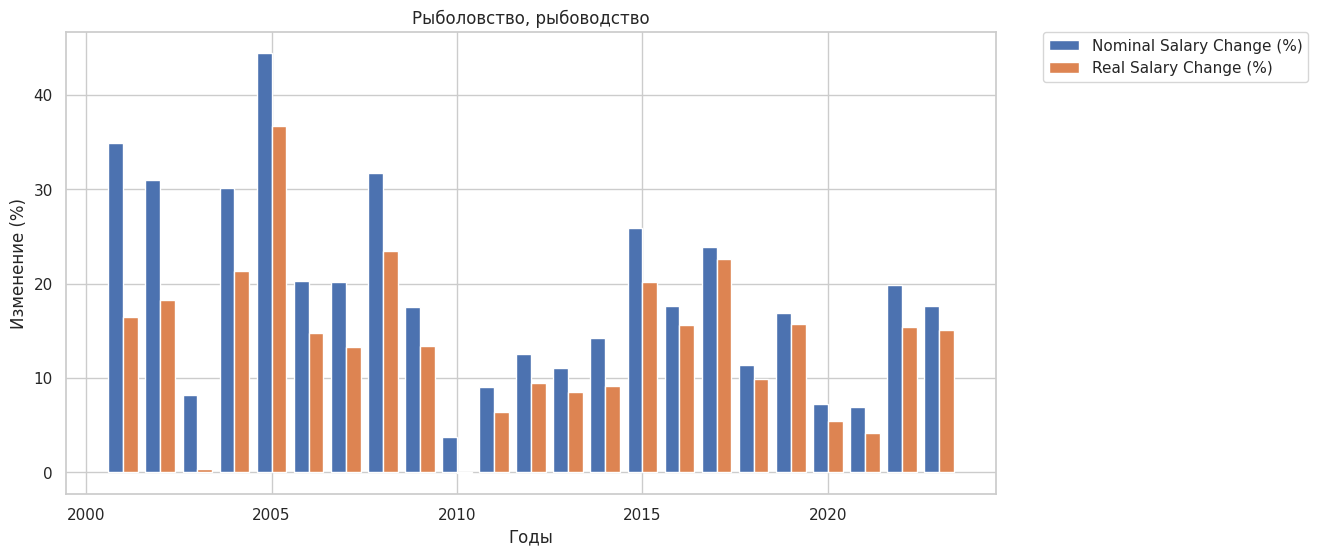

Абсолютное значение повышения зарплаты БЕЗ учета инфляции для направления Рыболовство, рыбоводство : 140290
Абсолютное значение повышения зарплаты с учетом инфляции для направления Рыболовство, рыбоводство : 40872


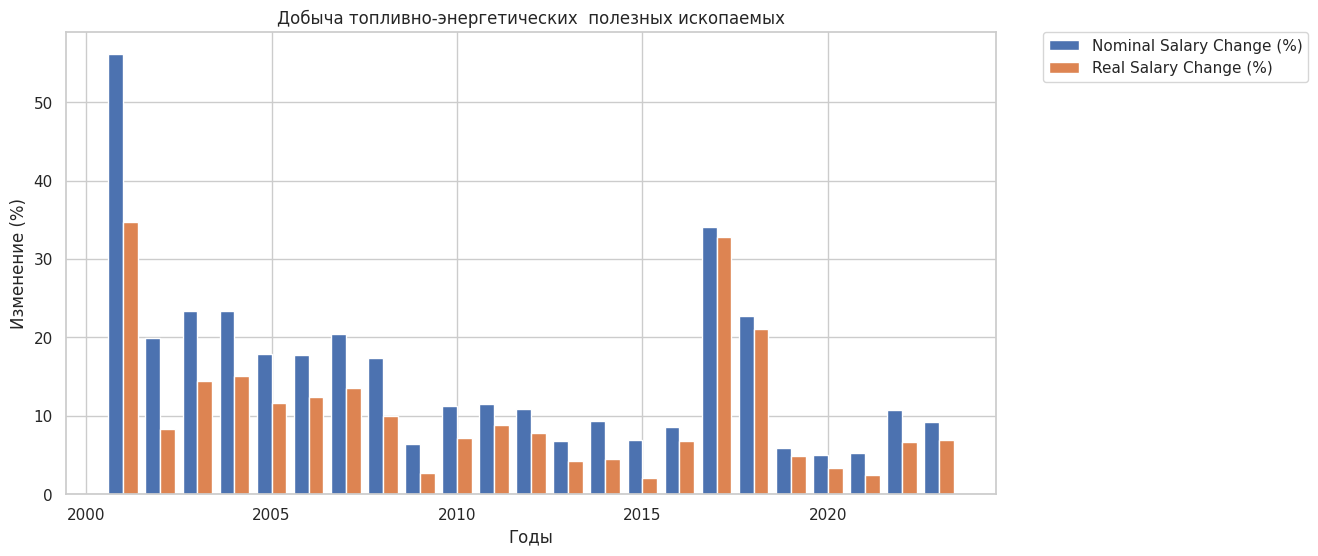

Абсолютное значение повышения зарплаты БЕЗ учета инфляции для направления Добыча топливно-энергетических  полезных ископаемых : 173962
Абсолютное значение повышения зарплаты с учетом инфляции для направления Добыча топливно-энергетических  полезных ископаемых : 48846


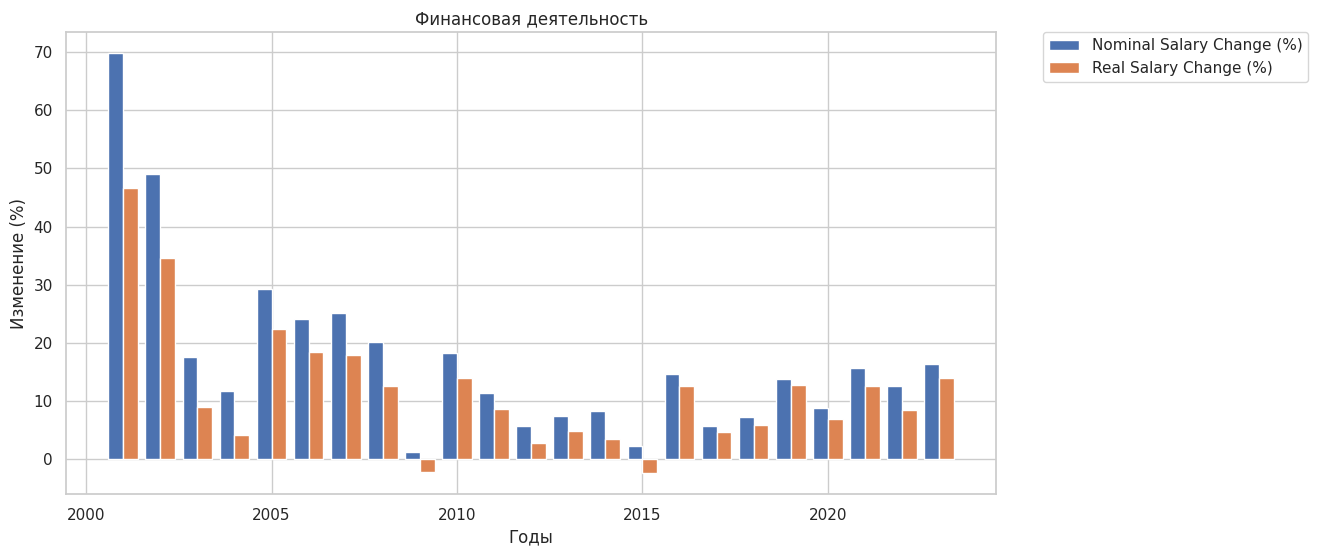

Абсолютное значение повышения зарплаты БЕЗ учета инфляции для направления Финансовая деятельность : 165368
Абсолютное значение повышения зарплаты с учетом инфляции для направления Финансовая деятельность : 47181


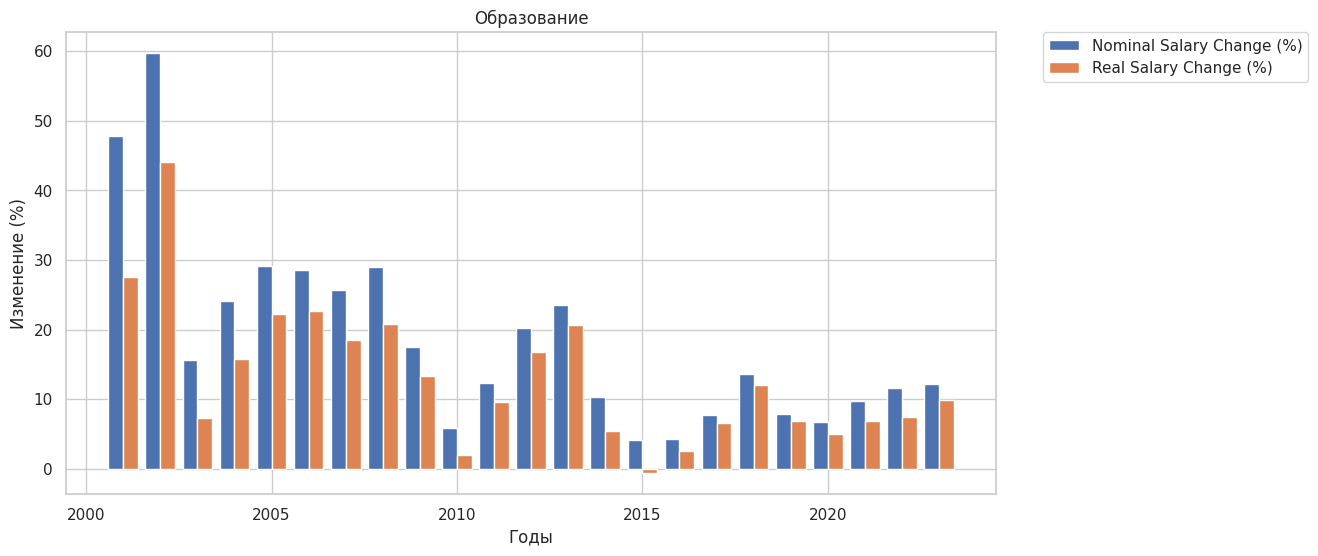

Абсолютное значение повышения зарплаты БЕЗ учета инфляции для направления Образование : 53075
Абсолютное значение повышения зарплаты с учетом инфляции для направления Образование : 15376


In [73]:
import seaborn as sns
activities = df['Экономическая деятельность'].values

for i in activities:
  economic_activity = df[df['Экономическая деятельность'] == i].values[0][1:]
  # Инициализируем переменную для совокупного коэффициента инфляции
  cumulative_inflation = 0

  # Рассчитываем реальную зарплату с учетом совокупной инфляции
  real_salary = []
  for nominal, cumulative_inflation in zip(economic_activity, new_inflation):
    #print(cumulative_inflation)
    real_salary.append(nominal/(1+cumulative_inflation/100))
  #print(real_salary)

  # Построение графика
  sns.set(style="whitegrid")  # Выбор стиля
  plt.figure(figsize=(12, 6))  # Установка размера фигуры

  # Создание столбчатой диаграммы изменений
  bar_width = 0.4

  #расчет процентного изменения
  nominal_change = pd.Series(economic_activity).pct_change().dropna() * 100
  real_change = pd.Series(real_salary).pct_change().dropna() * 100
  # Построение столбцов для процентного изменения номинальной зарплаты
  plt.bar(years[1:] - bar_width/2, nominal_change, width=bar_width, label='Nominal Salary Change (%)')
  # Построение столбцов для процентного изменения реальной зарплаты
  plt.bar(years[1:] + bar_width/2, real_change, width=bar_width, label='Real Salary Change (%)')


  # Добавление подписей
  plt.title(i)
  plt.xlabel("Годы")
  #plt.ylabel("Зарплата (рубли)")
  plt.ylabel("Изменение (%)")

  # Перемещаем легенду за пределы графика
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

  # Отображение сетки
  plt.grid(True)
  # Отображение графика
  plt.show()
  print('Абсолютное значение повышения зарплаты БЕЗ учета инфляции для направления',i,':', round((economic_activity[-1]-economic_activity[0])))
  print('Абсолютное значение повышения зарплаты с учетом инфляции для направления',i,':', round((real_salary[-1]-real_salary[0])))